In [1]:
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

<Logger detectron2 (DEBUG)>

In [2]:
from detectron2.data.datasets import register_coco_instances

In [3]:
register_coco_instances('lslm_coco_test', {}, 
                        '/home/workspace/bolt_nut/datasets/annotations/lslm_test.json', 
                       '/home/workspace/bolt_nut/datasets/lslm-test')

In [4]:
from detectron2.data import MetadataCatalog, DatasetCatalog

In [5]:
coco_lslm_test_metadata = MetadataCatalog.get("lslm_coco_test")
test_dataset_dicts = DatasetCatalog.get("lslm_coco_test")
coco_lslm_test_metadata

[03/29 12:34:37 d2.data.datasets.coco]: Loaded 10 images in COCO format from /home/workspace/bolt_nut/datasets/annotations/lslm_test.json


Metadata(evaluator_type='coco', image_root='/home/workspace/bolt_nut/datasets/lslm-test', json_file='/home/workspace/bolt_nut/datasets/annotations/lslm_test.json', name='lslm_coco_test', thing_classes=['bolt', 'nut'], thing_dataset_id_to_contiguous_id={1: 0, 2: 1})

In [6]:
import random 
import cv2
from detectron2.utils.visualizer import Visualizer
from google.colab.patches import cv2_imshow

/root/anaconda3/lib/python3.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


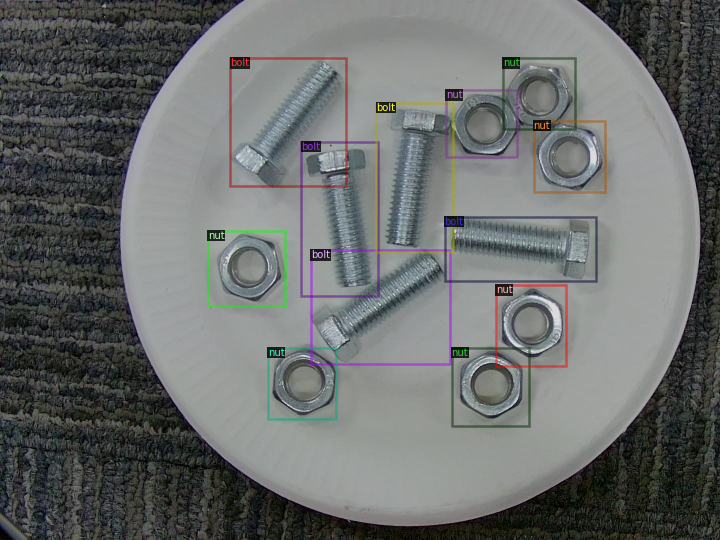

In [7]:
for image in random.sample(test_dataset_dicts, 1):
    img = cv2.imread(image["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=coco_lslm_test_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(image)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [8]:
from detectron2.engine import DefaultPredictor, default_setup
from detectron2.config import get_cfg
from detectron2 import model_zoo

In [9]:
def setup_cfg(args):
    """设置基本参数"""
    cfg = get_cfg()
    
    cfg.merge_from_file(args.config_file)
    cfg.merge_from_list(args.opts)
    # cfg.DATASETS.TRAIN = ("lslm_coco_train", )
    cfg.DATASETS.TEST = ("lslm_coco_test", )
    cfg.DATALOADER.NUM_WORKERS = 2
    
    # Let training initialize from model zoo
    # cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  
    cfg.MODEL.WEIGHTS = args.model_weights
    
    cfg.SOLVER.IMS_PER_BATCH = 2
    # pick a good LR
    cfg.SOLVER.BASE_LR = 0.00025 
    # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
    cfg.SOLVER.MAX_ITER = 300 
    # faster, and good enough for this toy dataset (default: 512)
    cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   
    # coco datasets(bolt, nut)
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
    cfg.MODEL.RPN.NMS_THRESH=0.5
    
    cfg.freeze()
    default_setup(cfg, args)
    
    return cfg

In [10]:
import argparse 

In [11]:
parser = argparse.ArgumentParser(description="LSLM test for builtin models")
parser.add_argument(
    "--config-file",
    default="/home/workspace/bolt_nut/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml",
    metavar="FILE",
    help="path to config file",
    )
parser.add_argument(
    "--model-weights", 
    default="/home/workspace/bolt_nut/models/model_final.pth", 
    type=str, 
    help="Initial weights path.", 
    )
parser.add_argument(
    "--opts",
    help="Modify config options using the command-line 'KEY VALUE' pairs",
    default=[],
    nargs=argparse.REMAINDER,
    )

_StoreAction(option_strings=['--opts'], dest='opts', nargs='...', const=None, default=[], type=None, choices=None, help="Modify config options using the command-line 'KEY VALUE' pairs", metavar=None)

In [12]:
args = parser.parse_args(args=[])
print(args.model_weights)

/home/workspace/bolt_nut/models/model_final.pth


In [13]:
cfg = setup_cfg(args)
cfg

[03/29 12:34:56 detectron2]: Rank of current process: 0. World size: 1
[03/29 12:34:56 detectron2]: Rank of current process: 0. World size: 1
[03/29 12:34:57 detectron2]: Environment info:
------------------------  --------------------------------------------------------------
sys.platform              linux
Python                    3.7.4 (default, Aug 13 2019, 20:35:49) [GCC 7.3.0]
numpy                     1.17.2
detectron2                0.1.1 @/root/anaconda3/lib/python3.7/site-packages/detectron2
detectron2 compiler       GCC 7.4
detectron2 CUDA compiler  10.1
detectron2 arch flags     sm_70
DETECTRON2_ENV_MODULE     <not set>
PyTorch                   1.4.0 @/root/anaconda3/lib/python3.7/site-packages/torch
PyTorch debug build       False
CUDA available            True
GPU 0,1,2,3,4,5,6,7       Tesla V100-PCIE-32GB
CUDA_HOME                 /usr/local/cuda
NVCC                      Cuda compilation tools, release 10.1, V10.1.243
Pillow                    6.2.0
torchvision       

[03/29 12:34:57 detectron2]: Running with full config:
CUDNN_BENCHMARK: False
DATALOADER:
  ASPECT_RATIO_GROUPING: True
  FILTER_EMPTY_ANNOTATIONS: True
  NUM_WORKERS: 2
  REPEAT_THRESHOLD: 0.0
  SAMPLER_TRAIN: TrainingSampler
DATASETS:
  PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
  PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
  PROPOSAL_FILES_TEST: ()
  PROPOSAL_FILES_TRAIN: ()
  TEST: ('lslm_coco_test',)
  TRAIN: ('coco_2017_train',)
GLOBAL:
  HACK: 1.0
INPUT:
  CROP:
    ENABLED: False
    SIZE: [0.9, 0.9]
    TYPE: relative_range
  FORMAT: BGR
  MASK_FORMAT: polygon
  MAX_SIZE_TEST: 1333
  MAX_SIZE_TRAIN: 1333
  MIN_SIZE_TEST: 800
  MIN_SIZE_TRAIN: (640, 672, 704, 736, 768, 800)
  MIN_SIZE_TRAIN_SAMPLING: choice
MODEL:
  ANCHOR_GENERATOR:
    ANGLES: [[-90, 0, 90]]
    ASPECT_RATIOS: [[0.5, 1.0, 2.0]]
    NAME: DefaultAnchorGenerator
    OFFSET: 0.0
    SIZES: [[32], [64], [128], [256], [512]]
  BACKBONE:
    FREEZE_AT: 2
    NAME: build_resnet_fpn_backbone
  DEVICE: cuda
  FPN:
    FUSE_TYPE: 

CfgNode({'VERSION': 2, 'MODEL': CfgNode({'LOAD_PROPOSALS': False, 'MASK_ON': False, 'KEYPOINT_ON': False, 'DEVICE': 'cuda', 'META_ARCHITECTURE': 'GeneralizedRCNN', 'WEIGHTS': '/home/workspace/bolt_nut/models/model_final.pth', 'PIXEL_MEAN': [103.53, 116.28, 123.675], 'PIXEL_STD': [1.0, 1.0, 1.0], 'BACKBONE': CfgNode({'NAME': 'build_resnet_fpn_backbone', 'FREEZE_AT': 2}), 'FPN': CfgNode({'IN_FEATURES': ['res2', 'res3', 'res4', 'res5'], 'OUT_CHANNELS': 256, 'NORM': '', 'FUSE_TYPE': 'sum'}), 'PROPOSAL_GENERATOR': CfgNode({'NAME': 'RPN', 'MIN_SIZE': 0}), 'ANCHOR_GENERATOR': CfgNode({'NAME': 'DefaultAnchorGenerator', 'SIZES': [[32], [64], [128], [256], [512]], 'ASPECT_RATIOS': [[0.5, 1.0, 2.0]], 'ANGLES': [[-90, 0, 90]], 'OFFSET': 0.0}), 'RPN': CfgNode({'HEAD_NAME': 'StandardRPNHead', 'IN_FEATURES': ['p2', 'p3', 'p4', 'p5', 'p6'], 'BOUNDARY_THRESH': -1, 'IOU_THRESHOLDS': [0.3, 0.7], 'IOU_LABELS': [0, -1, 1], 'BATCH_SIZE_PER_IMAGE': 256, 'POSITIVE_FRACTION': 0.5, 'BBOX_REG_WEIGHTS': (1.0, 1.0

# 预测器

In [14]:
predictor = DefaultPredictor(cfg)

[03/29 12:35:06 fvcore.common.checkpoint]: Loading checkpoint from /home/workspace/bolt_nut/models/model_final.pth


In [15]:
from detectron2.utils.visualizer import ColorMode

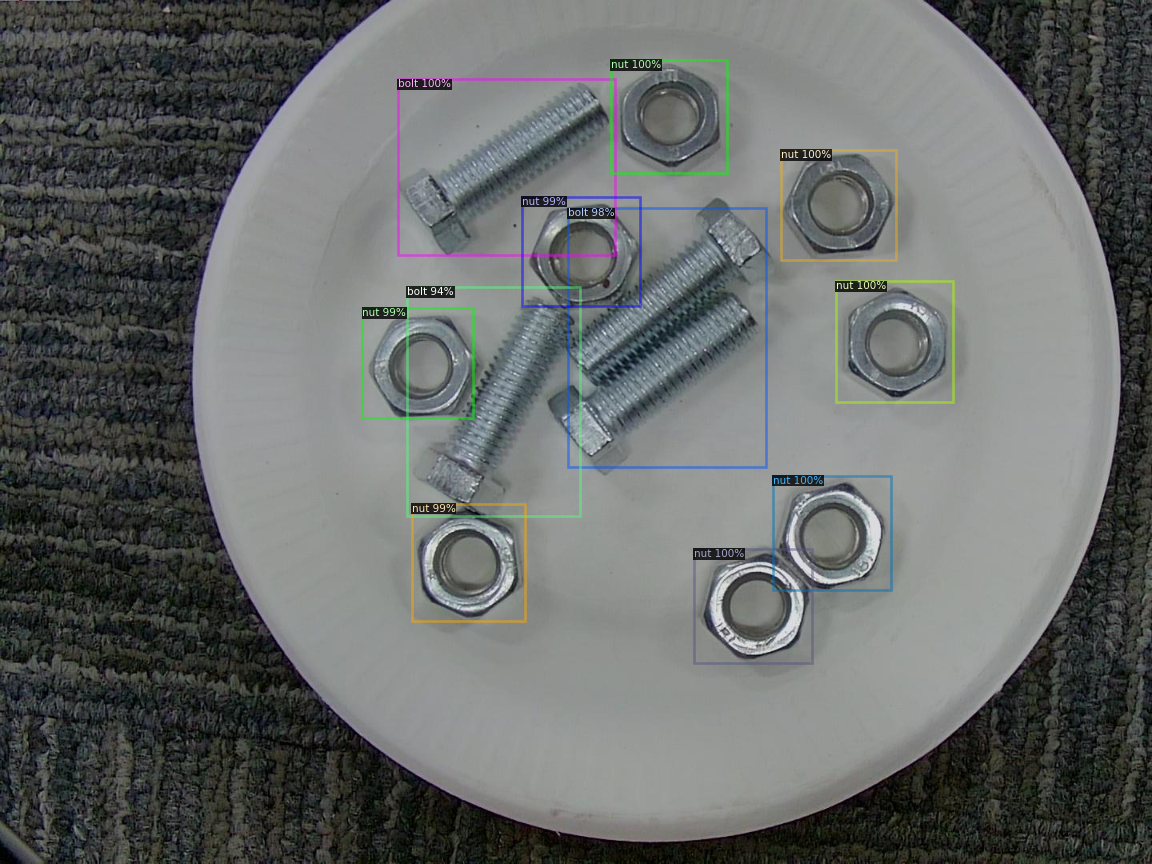

In [16]:
for d in random.sample(test_dataset_dicts, 1):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=coco_lslm_test_metadata, 
                   scale=0.8)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

In [17]:
outputs

{'instances': Instances(num_instances=11, image_height=1080, image_width=1440, fields=[pred_boxes: Boxes(tensor([[ 867.2932,  686.4431, 1015.2668,  828.8953],
         [ 966.2088,  595.0877, 1114.0723,  737.9186],
         [ 975.9253,  188.3449, 1119.4578,  326.2521],
         [ 763.8914,   75.6903,  909.2968,  217.0674],
         [ 497.3224,  100.1724,  768.5142,  319.9636],
         [1044.7340,  352.4409, 1191.4794,  502.4655],
         [ 514.3944,  630.0513,  656.4862,  777.1224],
         [ 453.0871,  385.7448,  590.6519,  523.5362],
         [ 652.7551,  246.7224,  799.9548,  382.7228],
         [ 709.3823,  261.1176,  957.4955,  584.2032],
         [ 508.9691,  359.6657,  725.5454,  644.8658]], device='cuda:0')), scores: tensor([0.9984, 0.9983, 0.9978, 0.9973, 0.9969, 0.9968, 0.9950, 0.9942, 0.9906,
         0.9838, 0.9363], device='cuda:0'), pred_classes: tensor([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0], device='cuda:0')])}

In [18]:
outputs.get('instances').pred_boxes.to('cpu').tensor.numpy()

array([[ 867.29315,  686.44305, 1015.26685,  828.89526],
       [ 966.2088 ,  595.0877 , 1114.0723 ,  737.91864],
       [ 975.9253 ,  188.34491, 1119.4578 ,  326.2521 ],
       [ 763.8914 ,   75.69032,  909.2968 ,  217.06744],
       [ 497.32242,  100.17242,  768.51416,  319.9636 ],
       [1044.734  ,  352.44086, 1191.4794 ,  502.46545],
       [ 514.3944 ,  630.0513 ,  656.4862 ,  777.12244],
       [ 453.0871 ,  385.74478,  590.6519 ,  523.5362 ],
       [ 652.7551 ,  246.72235,  799.95483,  382.7228 ],
       [ 709.38226,  261.1176 ,  957.4955 ,  584.2032 ],
       [ 508.96906,  359.66568,  725.5454 ,  644.8658 ]], dtype=float32)

In [19]:
outputs.get('instances').pred_classes.to('cpu').numpy()

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0])

# 使用Detectorn2 API函数进行Evaluation，计算各个参数

In [20]:
# 导入基本detectorn2 API函数进行模型评测
from detectron2.modeling import build_model
from detectron2.data import build_detection_test_loader 
from detectron2.evaluation import COCOEvaluator
from detectron2.evaluation import inference_on_dataset
import os 

In [21]:
def lslm_evaluation(cfg, output_dir=None):
    # 创建模型
    model = build_model(cfg)
    # 创建数据器
    lslm_evaluation_data_loader = build_detection_test_loader(cfg, cfg.DATASETS.TEST[0])
    # 创建评估器
    if output_dir is None:
        print(cfg.OUTPUT_DIR)
        output_dir = os.path.join(cfg.OUTPUT_DIR, "inference")
    lslm_coco_evaluator = COCOEvaluator(cfg.DATASETS.TEST[0], cfg, True, output_dir=output_dir)
    # 进行数据评估
    evaluation_result = inference_on_dataset(model, lslm_evaluation_data_loader, lslm_coco_evaluator)
    
    return evaluation_result 

In [23]:
evl_res = lslm_evaluation(cfg)
evl_res

[03/29 12:36:02 d2.data.datasets.coco]: Loaded 10 images in COCO format from /home/workspace/bolt_nut/datasets/annotations/lslm_test.json
[03/29 12:36:02 d2.data.datasets.coco]: Loaded 10 images in COCO format from /home/workspace/bolt_nut/datasets/annotations/lslm_test.json
[03/29 12:36:02 d2.data.common]: Serializing 10 elements to byte tensors and concatenating them all ...
[03/29 12:36:02 d2.data.common]: Serializing 10 elements to byte tensors and concatenating them all ...
[03/29 12:36:02 d2.data.common]: Serialized dataset takes 0.01 MiB
[03/29 12:36:02 d2.data.common]: Serialized dataset takes 0.01 MiB
./output
[03/29 12:36:02 d2.evaluation.evaluator]: Start inference on 10 images
[03/29 12:36:02 d2.evaluation.evaluator]: Start inference on 10 images
[03/29 12:36:03 d2.evaluation.evaluator]: Total inference time: 0:00:00.270984 (0.054197 s / img per device, on 1 devices)
[03/29 12:36:03 d2.evaluation.evaluator]: Total inference time: 0:00:00.270984 (0.054197 s / img per device,

OrderedDict([('bbox',
              {'AP': 0.0,
               'AP-bolt': 0.0,
               'AP-nut': 0.0,
               'AP50': 0.0,
               'AP75': 0.0,
               'APl': 0.0,
               'APm': nan,
               'APs': nan})])

# 目标检测评价指标mAP的计算

1.组织ground truth box 信息，存储格式{'1':{'file_name':'', 'bboxs':[], 'categorys':[]}, '2':{}}

In [24]:
import json

In [25]:
def get_image_id_file_name(images_info):
    images = {} 
    for single_image in images_info:
        # id 是每个文件的唯一标识
        images[str(single_image.get('id'))] = single_image.get('file_name')
    
    return images 

In [26]:
def get_category_id(categories_info):
    categories = {} 
    for single in categories_info:
        categories[single.get('name')] = single.get('id')
    
    return categories

In [27]:
def get_ground_truth(test_label_path="../../datasets/annotations/lslm_test.json"):
    with open(test_label_path, mode='r', encoding='utf-8') as fp:
        bbox_dict = json.load(fp)
        
        ground_truth_dict = {}
        # 获取每个image_id对应的image file name 
        images = get_image_id_file_name(bbox_dict.get('images'))
        # 获取每个类别对应的id
        categories = get_category_id(bbox_dict.get('categories'))
        annotations = bbox_dict.get('annotations')
        for single_annotation in annotations:
            if single_annotation.get('image_id') not in ground_truth_dict.keys():
                temp_dict = {'file_name': images.get(str(single_annotation.get('image_id'))), 
                             'bboxes': [], 'categories': []}
                
                object_box = single_annotation.get('bbox')
                # 由[x, y, w, h] to [x_left, y_top, x_right, y_bot]
                temp_dict.get('bboxes').append([object_box[0], object_box[1], 
                                               object_box[0]+object_box[2], object_box[1]+object_box[3]])
                temp_dict.get('categories').append(single_annotation.get('category_id'))
                ground_truth_dict[single_annotation.get('image_id')] = temp_dict
            else:
                object_box = single_annotation.get('bbox')
                # 由[x, y, w, h] to [x_left, y_top, x_right, y_bot]
                ground_truth_dict.get(single_annotation.get('image_id')).get('bboxes').append([object_box[0], object_box[1], 
                                               object_box[0]+object_box[2], object_box[1]+object_box[3]])
                ground_truth_dict.get(single_annotation.get('image_id')).get('categories').append(single_annotation.get('category_id'))
    
    return ground_truth_dict, categories

In [28]:
ground_truth_dict, categories = get_ground_truth()
ground_truth_dict, categories

({'1': {'bboxes': [[761.043, 223.652, 986.434, 493.565],
    [822.261, 318.261, 1017.044, 610.435],
    [758.261, 123.478, 902.957, 273.739],
    [446.609, 257.043, 602.435, 404.521],
    [582.957, 201.391, 724.87, 343.304],
    [666.435, 296, 805.565, 443.478],
    [596.87, 446.261, 755.479, 599.304],
    [674.783, 707.826, 819.479, 860.869],
    [861.217, 688.348, 1003.13, 846.957],
    [966.957, 602.087, 1100.522, 755.13]],
   'categories': [1, 1, 2, 2, 2, 2, 2, 2, 2, 2],
   'file_name': '1.jpg'},
  '10': {'bboxes': [[446.676, 250.167, 736.067, 372.602],
    [638.676, 325.297, 922.502, 453.297],
    [950.329, 361.471, 1209.112, 609.123],
    [432.763, 436.602, 722.154, 586.863],
    [708.242, 461.645, 869.633, 776.08],
    [813.981, 155.558, 955.894, 297.471],
    [947.546, 177.819, 1092.242, 308.602],
    [900.242, 347.558, 1042.155, 497.819],
    [599.72, 520.08, 749.981, 670.341],
    [986.502, 567.384, 1136.763, 709.297],
    [802.85, 695.384, 961.459, 848.427]],
   'categories'

In [29]:
ground_truth_dict.keys()

dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

获取预测的bbox，存储格式{'1':{'file_name':'', 'bboxs':[], 'categorys':[]}, '2':{}}

In [30]:
test_dataset_dicts[0]

{'annotations': [{'bbox': [761.043, 223.652, 225.39099999999996, 269.913],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [822.261, 318.261, 194.78300000000002, 292.1739999999999],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [758.261, 123.478, 144.69600000000003, 150.26099999999997],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 1,
   'iscrowd': 0},
  {'bbox': [446.609, 257.043, 155.82599999999996, 147.478],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 1,
   'iscrowd': 0},
  {'bbox': [582.957, 201.391, 141.913, 141.91299999999998],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 1,
   'iscrowd': 0},
  {'bbox': [666.435, 296, 139.1300000000001, 147.478],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 1,
   'iscrowd': 0},
  {'bbox': [596.87, 446.261, 158.60900000000004, 153.04299999999995],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 1,
   'iscrowd

In [31]:
predict_bbox_dict = {}
for single_image_info in test_dataset_dicts:
    # 只截取图片name，不需要绝对路径
    temp_bbox_dict = {'file_name': single_image_info.get('file_name').split('/')[-1]}
    image_data = cv2.imread(single_image_info.get('file_name'))
    outputs = predictor(image_data).get('instances').to('cpu')
    
    temp_bbox_dict['bboxes'] = outputs.pred_boxes.tensor.numpy()
    temp_bbox_dict['categories'] = outputs.pred_classes.numpy()
    temp_bbox_dict['scores'] = outputs.scores.numpy()
    
    predict_bbox_dict[single_image_info.get('image_id')] = temp_bbox_dict

In [44]:
predict_bbox_dict, type(predict_bbox_dict['5']['bboxes'])

({'1': {'bboxes': array([[ 601.9852 ,  453.9013 ,  744.0974 ,  594.94366],
          [ 571.80316,  206.59032,  725.8329 ,  344.5811 ],
          [ 858.8431 ,  695.88135,  998.3287 ,  838.86896],
          [ 449.1303 ,  257.69553,  591.6038 ,  403.62274],
          [ 958.8335 ,  609.7087 , 1103.5555 ,  750.8499 ],
          [ 676.25745,  708.49176,  824.5159 ,  857.3131 ],
          [ 755.614  ,  135.49698,  906.6995 ,  272.16644],
          [ 658.1486 ,  309.1979 ,  813.30023,  435.94772],
          [ 757.2676 ,  216.13875, 1025.2828 ,  576.64966],
          [ 835.5504 ,  318.4151 , 1025.4208 ,  611.4742 ]], dtype=float32),
   'categories': array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0]),
   'file_name': '1.jpg',
   'scores': array([0.9980191 , 0.9976604 , 0.99749005, 0.9973763 , 0.9968989 ,
          0.99620616, 0.99619746, 0.99406105, 0.96634924, 0.9180139 ],
         dtype=float32)},
  '10': {'bboxes': array([[ 953.64056,  183.34639, 1091.8778 ,  320.83295],
          [ 813.8156 ,  158.96971,

筛选各个类别的目标框（包括GT，Predict），以及预测置信度分

In [41]:
import numpy as np 

In [42]:
def get_single_category_object_indexes(categories, category_id):
    if isinstance(categories, list):
        categories = np.array(categories)
        return np.where(categories==category_id)
    elif isinstance(categories, np.ndarray):
        return np.where(categories==category_id)

In [59]:
def get_single_object_info(image_info, category_id, predict=False):
    single_object_info = {}
    for key in image_info.keys():
        temp_single_image_single_object_info = {'bboxes':[], 'categories':[], 'scores':[]}
        if predict:
            # 预测类别索引从0开始，GT是从1开始的
            categories = image_info.get(key).get('categories')+1
        else:
            categories = image_info.get(key).get('categories')
        indexes = list(get_single_category_object_indexes(categories, category_id))
        bboxes = image_info.get(key).get('bboxes')
        if isinstance(bboxes, list):
            bboxes = np.array(bboxes)
        if isinstance(categories, list):
            categories = np.array(categories)
        
        temp_single_image_single_object_info.get('bboxes').extend(bboxes[indexes].tolist())
        temp_single_image_single_object_info.get('categories').extend(categories[indexes].tolist())
        if predict:
            scores = image_info.get(key).get('scores')
            if isinstance(scores, list):
                scores = np.array(scores)
            temp_single_image_single_object_info.get('scores').extend(scores[indexes].tolist())
            
        single_object_info[key] = temp_single_image_single_object_info
    
    return single_object_info

In [60]:
single_gt_object_info = get_single_object_info(ground_truth_dict, 2)
single_gt_object_info

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


{'1': {'bboxes': [[758.261, 123.478, 902.957, 273.739],
   [446.609, 257.043, 602.435, 404.521],
   [582.957, 201.391, 724.87, 343.304],
   [666.435, 296.0, 805.565, 443.478],
   [596.87, 446.261, 755.479, 599.304],
   [674.783, 707.826, 819.479, 860.869],
   [861.217, 688.348, 1003.13, 846.957],
   [966.957, 602.087, 1100.522, 755.13]],
  'categories': [2, 2, 2, 2, 2, 2, 2, 2],
  'scores': []},
 '10': {'bboxes': [[813.981, 155.558, 955.894, 297.471],
   [947.546, 177.819, 1092.242, 308.602],
   [900.242, 347.558, 1042.155, 497.819],
   [599.72, 520.08, 749.981, 670.341],
   [986.502, 567.384, 1136.763, 709.297],
   [802.85, 695.384, 961.459, 848.427]],
  'categories': [2, 2, 2, 2, 2, 2],
  'scores': []},
 '2': {'bboxes': [[711.024, 72.376, 864.067, 217.072],
   [699.894, 322.811, 844.59, 475.854],
   [635.894, 439.681, 769.459, 592.724],
   [961.459, 612.202, 1108.937, 756.898],
   [864.068, 698.463, 1003.198, 845.941],
   [683.198, 709.594, 822.328, 857.072]],
  'categories': [2, 2, 

In [61]:
single_predict_object_info = get_single_object_info(predict_bbox_dict, 2, predict=True)
single_predict_object_info

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an err

{'1': {'bboxes': [[601.9852294921875,
    453.90130615234375,
    744.097412109375,
    594.9436645507812],
   [571.8031616210938,
    206.59031677246094,
    725.8328857421875,
    344.5810852050781],
   [858.8430786132812, 695.88134765625, 998.3286743164062, 838.8689575195312],
   [449.13031005859375,
    257.6955261230469,
    591.6038208007812,
    403.62274169921875],
   [958.83349609375, 609.7086791992188, 1103.5555419921875, 750.8499145507812],
   [676.2574462890625,
    708.4917602539062,
    824.5159301757812,
    857.3131103515625],
   [755.614013671875,
    135.49697875976562,
    906.6995239257812,
    272.16644287109375],
   [658.1486206054688,
    309.1979064941406,
    813.3002319335938,
    435.9477233886719]],
  'categories': [2, 2, 2, 2, 2, 2, 2, 2],
  'scores': [0.9980190992355347,
   0.9976603984832764,
   0.9974900484085083,
   0.9973763227462769,
   0.996898889541626,
   0.9962061643600464,
   0.9961974620819092,
   0.9940610527992249]},
 '10': {'bboxes': [[953.64